<a href="https://colab.research.google.com/github/Reactodactyl/MovLensDataSet/blob/main/Recommender_Systems_Final_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Setup

In [176]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# Common imports
import pandas as pd
import numpy as np
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.cm as cm
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "recommender_sys_proj"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Loading The Data


![picture](https://drive.google.com/uc?export=view&id=1gIHAyThFFxwKwLl4kFTVeoE51Ig4pcTx)

In [177]:
# load the movie rating data into a dataframe
rating_header = ["user_id", "item_id", "rating", "timestamp"]
rating = pd.read_csv("ml-100k/u.data", sep = '\t', header = None, names=rating_header).drop("timestamp",axis=1)

In [178]:
rating.head()

,user_id,item_id,rating
0,196,242,3
1,186,302,3
2,22,377,1
3,244,51,2
4,166,346,1


In [179]:
rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [180]:
user_header = ["user_id", "age", "gender", "occupation", "zip_code"]
users = pd.read_csv("ml-100k/u.user", sep = '|', header = None, names=user_header)

In [181]:
users.head()

,user_id,age,gender,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [182]:
users.loc[users['zip_code'] == 'T8H1N']

,user_id,age,gender,occupation,zip_code
73,74,39,M,scientist,T8H1N
633,634,39,M,engineer,T8H1N


In [183]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip_code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


In [184]:
# load movie data into a dataframe
movie_header = ["item_id", "title", "release_date", "video_release_date", "IMDb_URL",
         "unknown", "Action", "Adventure", "Animation","Children's", "Comedy", "Crime",
         "Documentary", "Drama", "Fantasy", "Film-Noir", "Horror", "Musical", "Mystery", 
         "Romance", "Sci-Fi", "Thriller", "War", "Western"]
movies = pd.read_csv("ml-100k/u.item", sep = '|', header = None, encoding = 'latin1', names = movie_header)

In [185]:
movies['release_date'] = movies['release_date'].map(
        lambda x: x[-4:] if type(x) == str else x)
movies = movies.drop(columns=['video_release_date', "IMDb_URL"])
movies = movies.rename(columns={"release_date": "year"})
movies["year"] = pd.to_numeric(movies["year"])
movies["year_category"] = pd.cut(movies["year"], bins=[0, 1930, 1940, 1950, 1960, 1970, 1980, 1990, 2000], labels=[0, 1, 2, 3, 4, 5, 6, 7])
movies.head()

,item_id,title,year,unknown,Action,Adventure,Animation,Children's,Comedy,Crime,...,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,year_category
0,1,Toy Story (1995),1995.0,0,0,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,7
1,2,GoldenEye (1995),1995.0,0,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
2,3,Four Rooms (1995),1995.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,7
3,4,Get Shorty (1995),1995.0,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,7
4,5,Copycat (1995),1995.0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,7


In [186]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1682 entries, 0 to 1681
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   item_id        1682 non-null   int64   
 1   title          1682 non-null   object  
 2   year           1681 non-null   float64 
 3   unknown        1682 non-null   int64   
 4   Action         1682 non-null   int64   
 5   Adventure      1682 non-null   int64   
 6   Animation      1682 non-null   int64   
 7   Children's     1682 non-null   int64   
 8   Comedy         1682 non-null   int64   
 9   Crime          1682 non-null   int64   
 10  Documentary    1682 non-null   int64   
 11  Drama          1682 non-null   int64   
 12  Fantasy        1682 non-null   int64   
 13  Film-Noir      1682 non-null   int64   
 14  Horror         1682 non-null   int64   
 15  Musical        1682 non-null   int64   
 16  Mystery        1682 non-null   int64   
 17  Romance        1682 non-null   in

# Data Transformation & Combination

In [187]:
users_num = users.copy()
users_num["gender"].replace(['F', 'M'],[0, 1], inplace=True) # replace F and M with 0 and 1, respectively

In [188]:
occupation = pd.read_csv("ml-100k/u.occupation", header = None)
occupation_list = occupation.values
users_num["occupation"].replace(occupation_list,list(range(0, len(occupation_list))), inplace=True)
users_num.head()

,user_id,age,gender,occupation,zip_code
0,1,24,1,19,85711
1,2,53,0,13,94043
2,3,23,1,20,32067
3,4,24,1,19,43537
4,5,33,0,13,15213


In [189]:
# data aggregation
average_rating = rating[["item_id", "rating"]].groupby("item_id", as_index=False).mean()  # average rating per movie
average_rating.sort_values("rating",ascending=False).head()

,item_id,rating
813,814,5.0
1598,1599,5.0
1200,1201,5.0
1121,1122,5.0
1652,1653,5.0


In [190]:
# merge two dataframes (average_rating and movies)
average_rating_tab = pd.merge(average_rating, movies[["item_id", "title"]])

# Analyze The Data

array([[<AxesSubplot: title={'center': 'age'}>]], dtype=object)

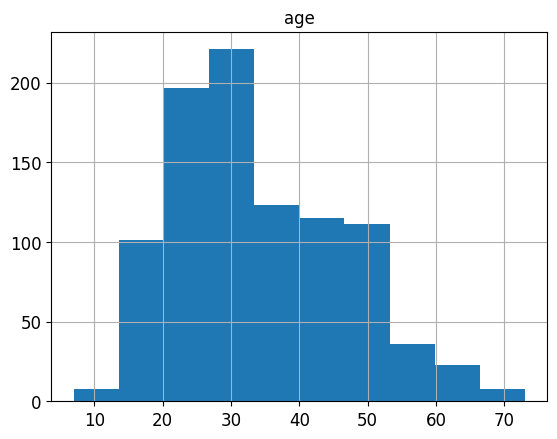

In [191]:
# age intervals distrubution
users.hist(column="age")
#users["age_category"] = pd.cut(users["age"], bins = [0, 10, 20, 30, 40, 50, 60, 70, 80], labels=[5, 15, 25, 35, 45, 55, 65, 75])
#users["age_category"].hist()

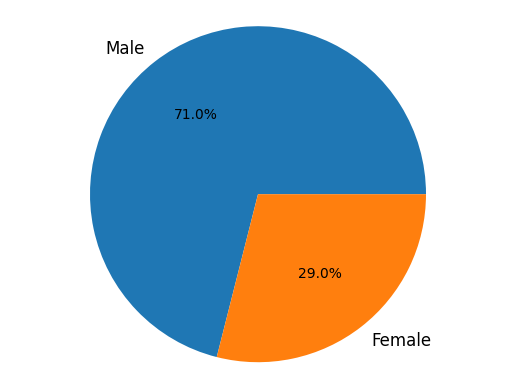

In [192]:
#Data by Gender
temp = users.groupby('gender')
plt.pie([temp.get_group("M").size,temp.get_group("F").size],labels=["Male","Female"],autopct='%1.1f%%')
plt.axis("equal")
plt.show()

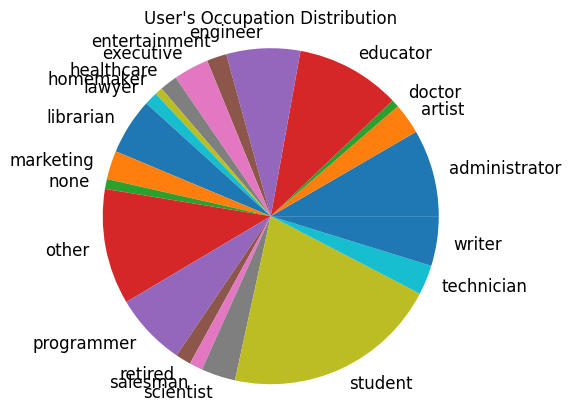

In [193]:
# occupation distrubution
occupation_count = users[["user_id", "occupation"]].groupby("occupation", as_index=False).size()  # count the numbers
plt.pie(occupation_count["size"], labels=occupation_count["occupation"])
plt.title("User's Occupation Distribution")
plt.axis("equal")
plt.show()

# Analyze Movie Data

In [194]:
genre = pd.read_csv("ml-100k/u.genre", sep = '|', header = None)
genre_list = genre[0].values
movie_set_genre = movies[genre_list]

In [195]:
init_num_clusters = len(movie_set_genre.columns)

# Movie Genre DataSet Clustering via PCA & Kmeans

In [196]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

reduced_movie_set = PCA(n_components=2).fit_transform(movie_set_genre)
k_means = KMeans(n_clusters=init_num_clusters,init='k-means++', random_state=42)
k_means.fit(reduced_movie_set)

KMeans(n_clusters=19, random_state=42)

In [197]:
# Step size of the mesh. Decrease to increase the quality of the VQ.
h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_movie_set[:, 0].min() - 1, reduced_movie_set[:, 0].max() + 1
y_min, y_max = reduced_movie_set[:, 1].min() - 1, reduced_movie_set[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

<Figure size 640x480 with 0 Axes>

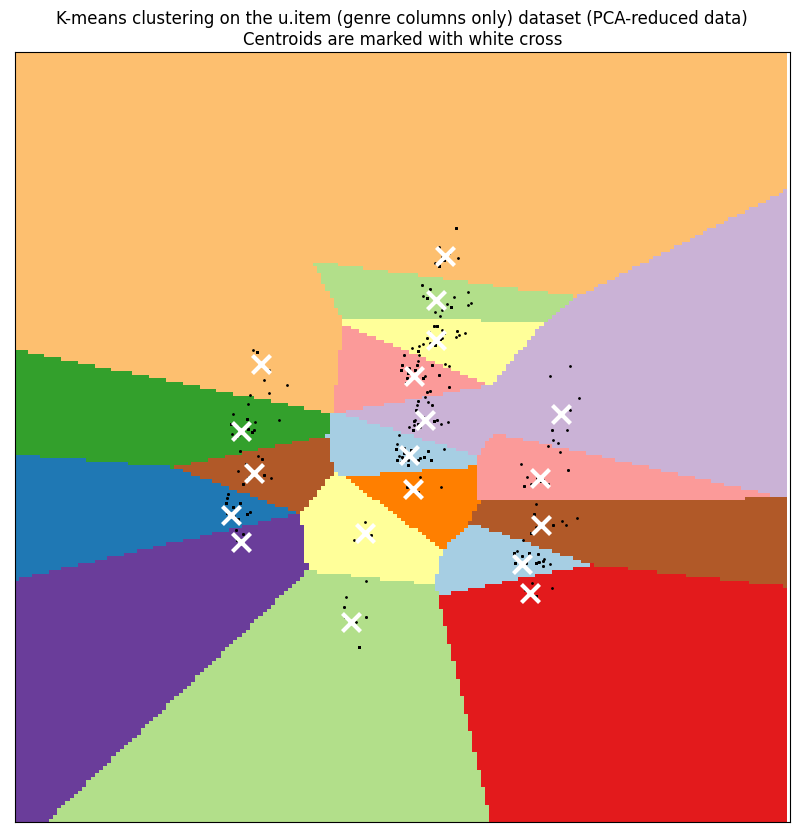

In [198]:
# Obtain labels for each point in mesh. Use last trained model.
Z = k_means.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.figure(figsize=(10,10))

plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_movie_set[:, 0], reduced_movie_set[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
plt.title(
    "K-means clustering on the u.item (genre columns only) dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)

plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

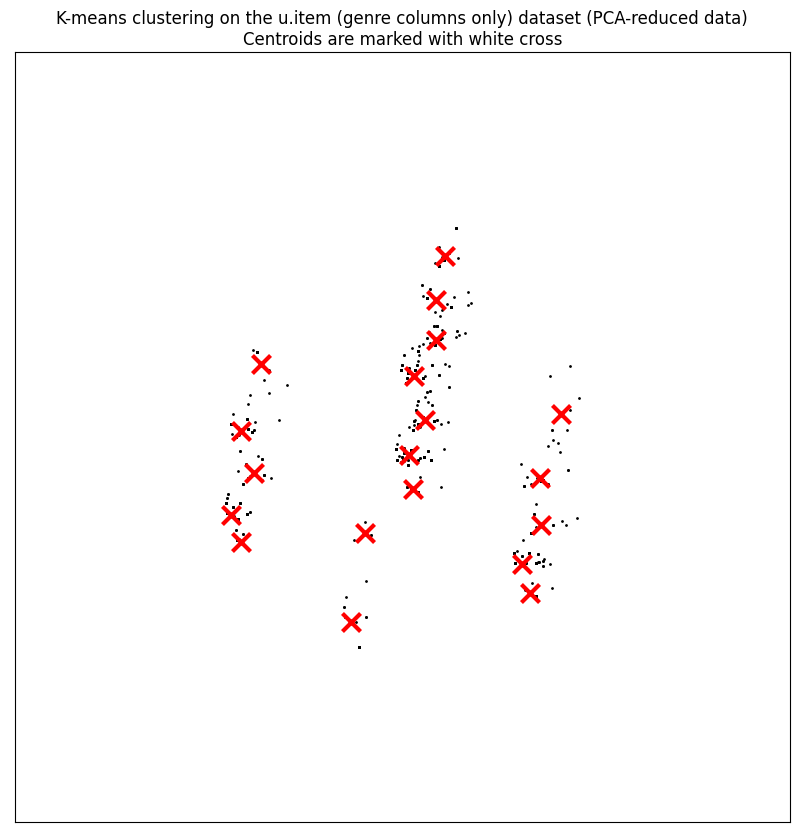

In [199]:
plt.figure(figsize=(10,10))
plt.plot(reduced_movie_set[:, 0], reduced_movie_set[:, 1], "k.", markersize=2)
# Plot the centroids as a white X
centroids = k_means.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="r",
    zorder=10,
)
plt.title(
    "K-means clustering on the u.item (genre columns only) dataset (PCA-reduced data)\n"
    "Centroids are marked with white cross"
)


plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

Finding the Optimal Cluster number for kmeans 

In [200]:
# possible number of clusters in the reduced dataset
range_of_clusters = np.arange(2,20)

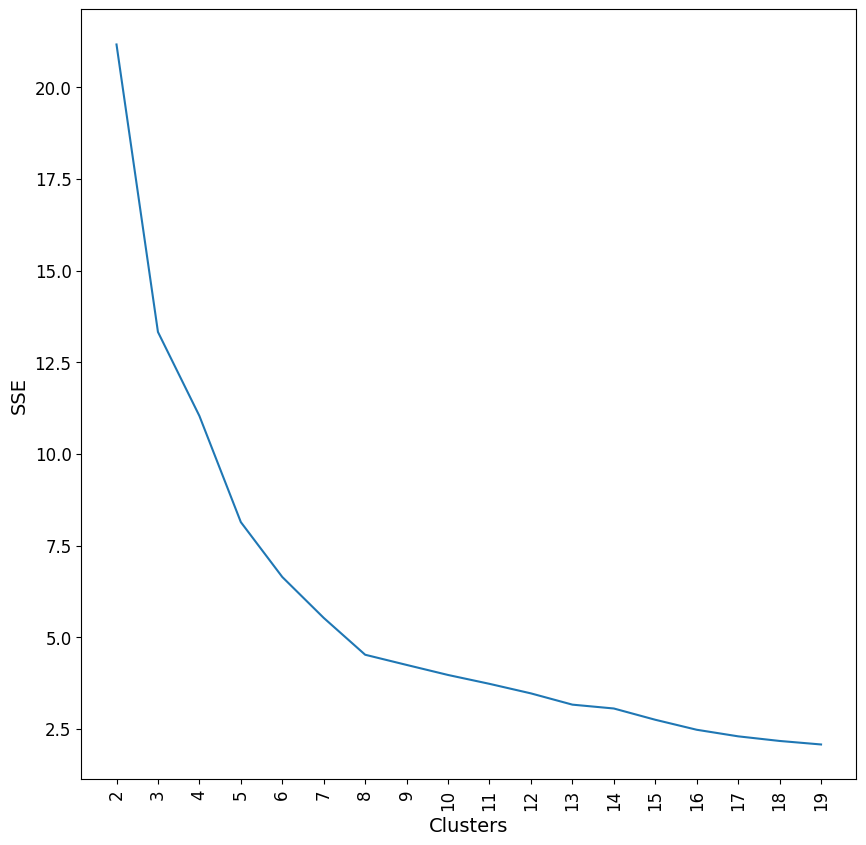

In [201]:
#elbow method
wcss = []
for i in range_of_clusters:
  k_means = KMeans(n_clusters=i,init='k-means++', random_state=42)
  k_means.fit_predict(reduced_movie_set)
  #scale the wcss vale
  wcss.append(np.sqrt(k_means.inertia_))
#plot elbow curve
fig = plt.figure(figsize=(10,10))
plt.plot(range_of_clusters,wcss)
plt.xticks(range_of_clusters,rotation=90)
plt.xlabel('Clusters')
plt.ylabel('SSE')
plt.show()

In [202]:
from sklearn.metrics import silhouette_samples,silhouette_score

In [203]:

def silhouetteAnalysis(range_of_clusters,reduced_movie_set):

  for n_clusters in range_of_clusters:

    # Create a subplot with 1 row and 2 columns
      fig, (ax1, ax2) = plt.subplots(1, 2)
      fig.set_size_inches(18, 7)

      # The 1st subplot is the silhouette plot
      # The silhouette coefficient can range from -1, 1 but in this example all
      # lie within [-0.1, 1]
      ax1.set_xlim([-0.1, 1])
      # The (n_clusters+1)*10 is for inserting blank space between silhouette
      # plots of individual clusters, to demarcate them clearly.
      ax1.set_ylim([0,len(reduced_movie_set)+(n_clusters + 1) * 10])

      k_means = KMeans(n_clusters=n_clusters,init='k-means++', random_state=42)
      cluster_labels = k_means.fit_predict(reduced_movie_set)

      silhouette_avg = silhouette_score(reduced_movie_set , cluster_labels)
      
      sample_silhouette_values = silhouette_samples(reduced_movie_set, cluster_labels)

      y_lower = 10

      for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
        np.arange(y_lower, y_upper),
        0,
        ith_cluster_silhouette_values,
        facecolor=color,
        edgecolor=color,
        alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples


        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
        reduced_movie_set[:,0], reduced_movie_set[:,1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        # Labeling the clusters
        centers = k_means.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(
          centers[:, 0],
          centers[:, 1],
          marker="o",
          c="white",
          alpha=1,
          s=200,
          edgecolor="k",
        )

        for i, c in enumerate(centers):
          ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

      ax2.set_title("The visualization of the clustered data.")
      ax2.set_xlabel("Feature space for the 1st feature")
      ax2.set_ylabel("Feature space for the 2nd feature")

      plt.suptitle(
          "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
          % n_clusters,
          fontsize=14,
          fontweight="bold",
      )

In [204]:
from sklearn.metrics import silhouette_samples,silhouette_score

#silhouetteAnalysis(range_of_clusters,reduced_movie_set)

# PairWise Distance Matrix (Movie)

In [205]:
import scipy.spatial.distance as sp_dist
genre_array = movie_set_genre.to_numpy()

x = genre_array[0]
y = genre_array[1]
print(sp_dist.cosine(x,y))
print(sp_dist.euclidean(x,y))
print(sp_dist.jaccard(x,y))

1.0
2.449489742783178
1.0


In [206]:
# compute the matrix of all pairwise distances of movies
import sklearn.metrics as metrics

distance_matrix = metrics.pairwise_distances(genre_array,metric = 'jaccard') # ‘cosine’, ‘euclidean’, etc
labeled_dist_matrix= pd.DataFrame(distance_matrix,index = movies["title"] , columns = movies["title"]) # add row and column headers


c:\Python310\lib\site-packages\sklearn\metrics\pairwise.py:2008: DataConversionWarning: Data was converted to boolean for metric jaccard
  warnings.warn(msg, DataConversionWarning)


Text(0.5, 1.0, 'HeatMap Showing the PairWise Distance Matrix')

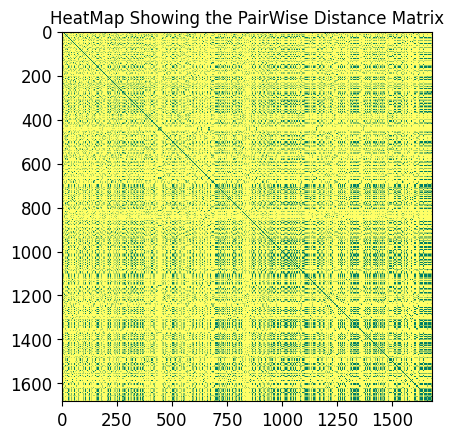

In [207]:
#plot a heatmap of the pairwise movie matrix
plt.imshow( labeled_dist_matrix, interpolation = 'nearest',cmap="summer")
plt.title('HeatMap Showing the PairWise Distance Matrix')


# Genre Analysis

In [208]:
info = pd.read_csv("ml-100k/u.info",sep= " ",header=None)
info.to_numpy()

print(info)
numUsers=info[0][0]
numMovies= info[0][1]
numRatings= info[0][2]
rating.info()

        0        1
0     943    users
1    1682    items
2  100000  ratings
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype
---  ------   --------------   -----
 0   user_id  100000 non-null  int64
 1   item_id  100000 non-null  int64
 2   rating   100000 non-null  int64
dtypes: int64(3)
memory usage: 2.3 MB


In [209]:
# get the average rating per genre
def get_avg_genre_ratings(rating,movies,genres):
  avg_genre_ratings = []
  for g in genres:
    genre_movies = movies[movies[g]==1]
    avg_rating_genre = rating[rating['item_id'].isin(genre_movies['item_id'])].loc[:,'rating'].mean().round(2)
    avg_genre_ratings.append(avg_rating_genre)
    #avg_genre_rating[g] = pd.Series(avg_rating_genre, index=[0]).to_frame()

  return avg_genre_ratings

In [210]:
avg_genre_ratings = get_avg_genre_ratings(rating, movies,genre_list )
print(avg_genre_ratings)

[3.2, 3.48, 3.5, 3.58, 3.35, 3.39, 3.63, 3.67, 3.69, 3.22, 3.92, 3.29, 3.52, 3.64, 3.62, 3.56, 3.51, 3.82, 3.61]


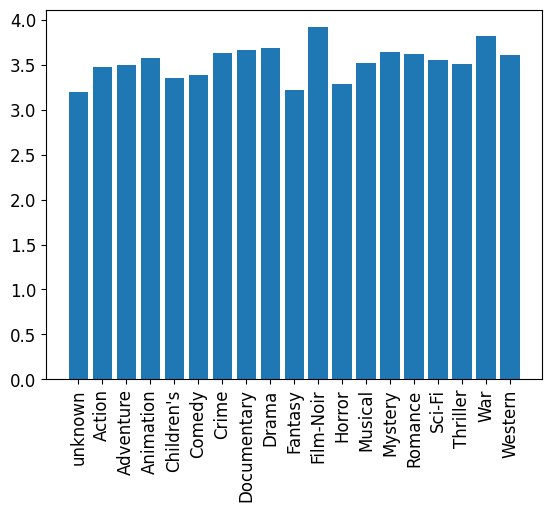

In [211]:
#plot a histogram of the various genres
plt.bar(x=movie_set_genre.columns,height=avg_genre_ratings)
plt.xticks(rotation = 90)
plt.show()

# Genre User-Based Insights


In [212]:
avg_genre_header = ['avg_unknown_rating','avg_action_rating','avg_adventure_rating','avg_animation_rating','avg_children_rating', 'avg_comedy_rating','avg_crime_rating','avg_documentary_rating','avg_drama_rating','avg_fantasy_rating','avg_film_noir_rating','avg_horror_rating','avg_musical_rating','avg_mystery_rating','avg_romance_rating','avg_scifi_rating','avg_thriller_rating','avg_war_rating','avg_western-rating']

In [213]:
#get the users average rating per genre
def get_user_genre_ratings(rating,movies,genres,columns_names):
  user_genre_ratings= pd.DataFrame()
  for g in genres:
    genre_movies = movies[movies[g] == 1 ]
    avg_genre_rating_per_user= rating[rating['item_id'].isin(genre_movies['item_id'])].loc[:, ['user_id', 'rating']].groupby(['user_id'])['rating'].mean().round(2)
    user_genre_ratings = pd.concat([user_genre_ratings, avg_genre_rating_per_user], axis=1 )
          
  user_genre_ratings.columns = columns_names
  return user_genre_ratings

In [214]:
user_genre_ratings = get_user_genre_ratings(rating, movies,genre_list,avg_genre_header )
user_genre_ratings.head()

,avg_unknown_rating,avg_action_rating,avg_adventure_rating,avg_animation_rating,avg_children_rating,avg_comedy_rating,avg_crime_rating,avg_documentary_rating,avg_drama_rating,avg_fantasy_rating,avg_film_noir_rating,avg_horror_rating,avg_musical_rating,avg_mystery_rating,avg_romance_rating,avg_scifi_rating,avg_thriller_rating,avg_war_rating,avg_western-rating
1,4.0,3.33,2.93,3.33,2.20,3.47,3.44,4.80,3.93,3.50,5.00,3.46,2.92,3.60,3.93,4.00,3.62,3.68,3.67
5,4.0,3.14,3.24,3.79,2.45,3.00,3.89,NaN,2.67,2.50,5.00,2.54,3.33,3.00,2.32,3.52,2.95,3.21,2.50
130,5.0,3.88,3.93,4.53,4.26,3.88,3.90,4.00,4.21,4.40,3.67,3.91,4.65,3.92,4.30,3.93,3.96,4.29,3.33
181,1.0,1.47,1.48,1.78,1.41,1.40,1.41,1.15,1.54,1.33,1.67,1.87,2.12,1.88,1.72,1.90,1.82,1.79,1.00
268,3.0,2.87,2.98,3.38,2.76,2.82,3.14,4.00,3.29,2.40,3.71,2.48,3.00,3.38,3.12,3.10,2.93,3.85,3.40


In [215]:
#experimental
#look for insight

user_genre_ratings.describe()

,avg_unknown_rating,avg_action_rating,avg_adventure_rating,avg_animation_rating,avg_children_rating,avg_comedy_rating,avg_crime_rating,avg_documentary_rating,avg_drama_rating,avg_fantasy_rating,avg_film_noir_rating,avg_horror_rating,avg_musical_rating,avg_mystery_rating,avg_romance_rating,avg_scifi_rating,avg_thriller_rating,avg_war_rating,avg_western-rating
count,10.000000,938.000000,901.000000,659.00000,805.000000,940.000000,914.000000,352.000000,943.000000,512.000000,618.000000,789.000000,754.000000,897.000000,943.000000,908.000000,937.000000,925.000000,491.000000
mean,3.200000,3.518827,3.527603,3.57827,3.372497,3.449723,3.643228,3.748722,3.728473,3.276328,3.892152,3.343701,3.422599,3.612731,3.659152,3.550385,3.546638,3.779978,3.668248
std,1.316561,0.588765,0.683275,0.83397,0.835904,0.549931,0.710548,1.031132,0.476117,0.977997,0.839753,0.805866,0.860933,0.737231,0.541121,0.663253,0.547051,0.646286,0.807355
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.330000,1.000000,1.000000,1.540000,1.000000,1.000000,1.000000,1.000000,1.000000,1.670000,1.000000,1.250000,1.000000,1.000000
25%,3.000000,3.182500,3.100000,3.00000,3.000000,3.120000,3.250000,3.000000,3.440000,2.800000,3.400000,3.000000,3.000000,3.140000,3.360000,3.200000,3.230000,3.500000,3.000000
50%,3.500000,3.575000,3.570000,3.67000,3.500000,3.480000,3.730000,4.000000,3.750000,3.250000,4.000000,3.380000,3.500000,3.670000,3.680000,3.600000,3.590000,3.860000,3.750000
75%,4.000000,3.917500,4.000000,4.00000,4.000000,3.810000,4.000000,4.500000,4.060000,4.000000,4.500000,4.000000,4.000000,4.000000,4.000000,4.000000,3.920000,4.210000,4.000000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Collaborative Filtering Model
# combination of  both user-based and item-based CF

In [216]:
# first construct the item-based collaborative filtering via KNN

# transform the rating data to a m*n array
#m = movies , n= users

movie_items_matrix = rating.pivot(
    index='user_id', columns='item_id', values='rating')

#mean-center each rating for each user
mean_centered_df=movie_items_matrix.apply(lambda x: x-x.mean())

#fill with na afterwards so it doesnt count towards the mean
mean_centered_df=mean_centered_df.fillna(0)

In [217]:
print(mean_centered_df)

item_id      1         2         3         4         5         6         7     \
user_id                                                                         
1        1.121681 -0.206107  0.966667 -0.550239 -0.302326  1.423077  0.201531   
2        0.121681  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
3        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
4        0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
5        0.121681 -0.206107  0.000000  0.000000  0.000000  0.000000  0.000000   
...           ...       ...       ...       ...       ...       ...       ...   
939      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
940      0.000000  0.000000  0.000000 -1.550239  0.000000  0.000000  0.201531   
941      1.121681  0.000000  0.000000  0.000000  0.000000  0.000000  0.201531   
942      0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
943      0.000000  1.793893 

In [218]:
#print the mean of each row
print(mean_centered_df.mean(axis=1))

user_id
1      0.013945
2      0.004057
3     -0.015619
4      0.013213
5     -0.037641
         ...   
939    0.031009
940   -0.018157
941    0.004706
942    0.023648
943   -0.001962
Length: 943, dtype: float64


In [219]:
#create the similarity matrix using adjusted cosine  
from scipy.spatial.distance import pdist, squareform
import preprocessingFuncts as pp
# sim_matrix =pd.DataFrame()
indexes = pp.readItemData()['item_id'].tolist()
sim_matrix = 1 - squareform(pdist(mean_centered_df.T, 'cosine'))
sim_matrix = pd.DataFrame(sim_matrix)
sim_matrix = sim_matrix.fillna(0)
sim_matrix.columns = indexes
sim_matrix.index = indexes
print(sim_matrix)

          1         2         3         4         5         6         7     \
1     1.000000  0.091331  0.074554  0.051377  0.114383  0.073914  0.109929   
2     0.091331  1.000000  0.073814  0.136619  0.061872 -0.007447  0.070359   
3     0.074554  0.073814  1.000000 -0.057460  0.027472  0.118627  0.023926   
4     0.051377  0.136619 -0.057460  1.000000 -0.106871  0.007538  0.072354   
5     0.114383  0.061872  0.027472 -0.106871  1.000000 -0.017280  0.073628   
...        ...       ...       ...       ...       ...       ...       ...   
1678  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1679  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1680  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1681  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   
1682  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000   

          8         9         10    ...  1673  1674  1675  1676

In [220]:
#verify the correctness of sim matrix for the first five columns with the first column
from scipy.spatial.distance import cosine
print(1 - cosine(mean_centered_df.loc[:,1], mean_centered_df.loc[:,2]))
print(1 - cosine(mean_centered_df.loc[:,1], mean_centered_df.loc[:,3]))
print(1 - cosine(mean_centered_df.loc[:,1], mean_centered_df.loc[:,4]))
print(1 - cosine(mean_centered_df.loc[:,1], mean_centered_df.loc[:,5]))

0.09133106690893122
0.0745542908196486
0.05137733015742296
0.11438293228004792


In [302]:
# alternative approach to compute the sim matrix and the k nearest neighbours
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split

# use 5 neighbours to make the predictions 
nbrs = KNeighborsClassifier(n_neighbors=5,algorithm='auto',metric='cosine')
#
#distances, indices = nbrs.kneighbors(mean_centered_df.T)

#print(distances)
#print(indices)

testData = pd.read_csv('ml-100k\\ua.test', sep = '\t', header = None, names=rating_header)
# testX, testY =  np.array(testData.loc[:,['user_id','item_id']]),np.array(testData.loc[:,'rating'])
testX, testY =  testData.loc[:,['user_id','item_id']],testData.loc[:,'rating']
# testY = testY.iloc[:,testY.columns[0]]
# print(type(test))
# print(testY)

trainX, X_test, trainY, y_test = train_test_split(testX, testY)

print(type(trainX),type(trainY))
print(testX.shape,testY.shape)
print(trainX.shape,trainY.shape)

print(trainX.values)


# trainX = trainX.to_numpy()
# trainY= trainY.to_numpy()

print(X_test.shape)
print(y_test.shape)

#print(X_test.info)


print(X_test.shape)
nbrs.fit(trainX.values, trainY.values)
predY=nbrs.predict(X_test.values)

<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>
(9430, 2) (9430,)
(7072, 2) (7072,)
[[ 764  321]
 [ 579 1074]
 [ 512   97]
 ...
 [ 107  302]
 [ 663  588]
 [ 887 1012]]
(2358, 2)
(2358,)
(2358, 2)


In [303]:
from sklearn.metrics import classification_report

print(classification_report(y_test, predY))

              precision    recall  f1-score   support

           1       0.06      0.05      0.05       144
           2       0.10      0.07      0.08       237
           3       0.26      0.34      0.30       617
           4       0.35      0.41      0.38       834
           5       0.24      0.15      0.19       526

    accuracy                           0.28      2358
   macro avg       0.20      0.20      0.20      2358
weighted avg       0.26      0.28      0.26      2358



In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(distances, interpolation = 'nearest',cmap="summer")

#sim_matrix.to_csv("Similiarity_Matrix.csv")
plt.colorbar()

In [ ]:
plt.figure(figsize=(12,12))
plt.imshow(sim_matrix, interpolation = 'nearest',cmap="summer")

#sim_matrix.to_csv("Similiarity_Matrix.csv")
plt.colorbar()

In [175]:
from models import SimCF
import preprocessingFuncts as pp

IBCF =SimCF("item")
print(IBCF.base)

IBCF.fit("ml-100k\\ua.base",distances,mean_centered_df)

print(IBCF.dataMatrix)
print(IBCF.simMatrix)



item_id
[[0.00000000e+00 7.53033943e-01 7.65061086e-01 7.87024063e-01
  7.87095173e-01]
 [8.88178420e-16 6.55789488e-01 6.64369376e-01 6.66549292e-01
  6.72777490e-01]
 [1.11022302e-16 7.38482600e-01 7.83336013e-01 7.85746826e-01
  8.00725392e-01]
 ...
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]
 [1.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  1.00000000e+00]]


In [172]:
#read in testing data
testData = pd.read_csv('ml-100k\\ua.test', sep = '\t', header = None, names=rating_header)
testX, testY =  testData.loc[:,['user_id','item_id']],testData.loc[:,'rating']


predY = IBCF.predict(testX)
#print(IBCF.dataDF)
print(predY)

9430
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

In [ ]:
print(len(predY),len(testY))

# finding the nearest neighbours based on the sim matrix 

# threshold based neighbours show stronger similarities, but there maybe less results
# Top N type guarantees output, but the quality is low and the relations are weak, since we have some negative correlations also showing up



In [ ]:
from sklearn.metrics import classification_report
print(classification_report(testY, predY))
